In [2]:
from sqlalchemy import create_engine

user = 'root'
password = 'root'
host = 'localhost'
port = '3306'
database = 'traffic_violation'

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [3]:
import pandas as pd
pd.set_option("display.max_columns",None)
df=pd.read_sql("fact_table",engine)
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Race,Gender,Driver City,Driver State,DL State,Arrest Type,District Number
0,00001e27-8bde-4328-8b33-2d2d9a9ce862,2015-11-04,10:54:00,MCP,"3rd District, Silver Spring",veirs mill/ennalls,39.039675,-77.054437,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,Citation,None,21-503(c),Not Applicable,None,XX,Unknown,2015,lincoln,NONE,not applicable,hispanic,F,gaithersburg,MD,MD,Marked Patrol,3.0
1,0000395c-bbf9-49e3-ba75-91e2da9e98d7,2022-07-13,10:22:00,MCP,Headquarters and Special Operations,macarthur blvd/wilson ln,38.972838,-77.147292,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,Warning,None,21-201(a1),Not Applicable,None,VA,Light Duty Truck,2022,ford,TK,white,hispanic,M,manassas park,VA,VA,Marked Patrol,NaN
2,00006268-72eb-42ff-b6b0-50c21d820e9c,2014-11-04,23:02:00,MCP,"3rd District, Silver Spring",e. randolph/billington rd,39.066070,-76.980695,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,Warning,None,22-226(a),Not Applicable,None,MD,Automobile,2014,hyundai,ELANTRA,blue,black,M,silver spring,MD,MD,Marked Patrol,3.0
3,000071c5-c385-4191-9cd7-e854d2054963,2016-07-15,07:49:00,MCP,"3rd District, Silver Spring",29 and southwood dr,NaN,NaN,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,None,None,None,Not Applicable,None,MD,Automobile,2016,ford,TK,black,black,F,silver spring,MD,MD,Marked Patrol,3.0
4,000099b1-4dcb-4f94-8aef-71ffb198890b,2016-12-07,08:18:00,MCP,"6th District, Gaithersburg / Montgomery Village",airpark rd & stratos ln,39.158037,-77.143687,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,None,None,None,Not Applicable,None,VA,Station Wagon,2016,nissan,PATHFINDER,black,white,M,fairfax,VA,VA,Marked Patrol,6.0


In [4]:
charges=pd.read_sql("charges",engine)
charges.head()

,charges_id,SeqID,Date Of Stop,Time Of Stop,Charge,Article,Description,Violation Type
0,0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,2023-05-01,23:11:00,13-401(b1),Transportation Article,operating unregistered motor vehicle on highway,Citation
1,1,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,16-101(a1),Transportation Article,driving to drive motor vehicle on highway with...,Citation
2,2,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,13-409(b),Transportation Article,failure to display registration card upon dema...,Citation
3,3,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,21-310(a),Transportation Article,driver of motor vehicle following vehicle clos...,Citation
4,4,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,21-801(b),Transportation Article,failure to control veh. speed on hwy. to avoid...,Citation


In [5]:
df.iloc[:,8:18].corr()

,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone
Accident,1.000000,0.054533,0.358954,0.363651,0.034724,0.009035,0.000785,0.003378,0.002366,0.003340
Belts,0.054533,1.000000,0.069756,0.055335,0.001004,-0.002594,0.001211,-0.003737,-0.000915,0.000188
Personal Injury,0.358954,0.069756,1.000000,-0.009302,-0.001400,0.005793,-0.000656,0.005202,0.004367,0.005437
Property Damage,0.363651,0.055335,-0.009302,1.000000,-0.001723,0.011566,0.005611,0.002232,0.006440,0.005324
Fatal,0.034724,0.001004,-0.001400,-0.001723,1.000000,0.001430,-0.000120,-0.000736,-0.000291,0.004202
Commercial License,0.009035,-0.002594,0.005793,0.011566,0.001430,1.000000,0.017446,0.085530,-0.000581,0.001145
HAZMAT,0.000785,0.001211,-0.000656,0.005611,-0.000120,0.017446,1.000000,0.019483,-0.000136,-0.000091
Commercial Vehicle,0.003378,-0.003737,0.005202,0.002232,-0.000736,0.085530,0.019483,1.000000,0.000189,0.000979
Alcohol,0.002366,-0.000915,0.004367,0.006440,-0.000291,-0.000581,-0.000136,0.000189,1.000000,0.003657
Work Zone,0.003340,0.000188,0.005437,0.005324,0.004202,0.001145,-0.000091,0.000979,0.003657,1.000000


In [6]:
# X
import plotly.express as px
fig = px.imshow(df.iloc[:,8:18].corr(),height=600,width=600,title="Correlation b/w Binary Variables")
fig.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_13444\4188727719.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




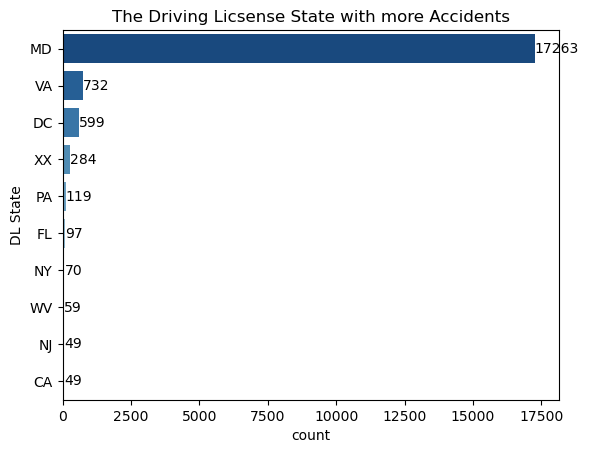

In [7]:
# X
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("The Driving Licsense State with more Accidents")
ax=sns.countplot(df[df["Accident"]==1]["DL State"],order=df[df["Accident"]==1]["DL State"].value_counts().head(10).index,palette="Blues_r")
for con in ax.containers:
    ax.bar_label(container=con)
plt.show()

In [8]:
state_list=df["Driver State"].unique().tolist()
state_list.insert(0,"ALL")
where_str=f"`Driver State`=='{state_list[1]}'"
temp=df.query(where_str)
temp.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Race,Gender,Driver City,Driver State,DL State,Arrest Type,District Number
0,00001e27-8bde-4328-8b33-2d2d9a9ce862,2015-11-04,10:54:00,MCP,"3rd District, Silver Spring",veirs mill/ennalls,39.039675,-77.054437,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,Citation,None,21-503(c),Not Applicable,None,XX,Unknown,2015,lincoln,NONE,not applicable,hispanic,F,gaithersburg,MD,MD,Marked Patrol,3.0
2,00006268-72eb-42ff-b6b0-50c21d820e9c,2014-11-04,23:02:00,MCP,"3rd District, Silver Spring",e. randolph/billington rd,39.066070,-76.980695,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,Warning,None,22-226(a),Not Applicable,None,MD,Automobile,2014,hyundai,ELANTRA,blue,black,M,silver spring,MD,MD,Marked Patrol,3.0
3,000071c5-c385-4191-9cd7-e854d2054963,2016-07-15,07:49:00,MCP,"3rd District, Silver Spring",29 and southwood dr,NaN,NaN,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,None,None,None,Not Applicable,None,MD,Automobile,2016,ford,TK,black,black,F,silver spring,MD,MD,Marked Patrol,3.0
5,0000a11f-80e6-4dd4-8128-b199929f76a9,2019-08-12,16:34:00,MCP,"2nd District, Bethesda",university blvd/lexington st,39.035515,-77.068132,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,Citation,None,13-411(f),Not Applicable,None,MD,Automobile,2019,acura,TL,gray,black,F,hyattsville,MD,MD,Marked Patrol,2.0
6,0000b339-ca9d-4a52-90a6-90ebd3110cd2,2012-05-06,23:14:00,MCP,"6th District, Gaithersburg / Montgomery Village",montgomery village avenue/stedwick road,39.164243,-77.203906,0,0,0,0,0,0,0,0,0,0,No,Not Applicable,None,None,None,Not Applicable,None,MD,Automobile,2012,honda,ACCORD,black,hispanic,M,montgomery village,MD,MD,Marked Patrol,6.0


C:\Users\kumar\AppData\Local\Temp\ipykernel_13444\3873552305.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




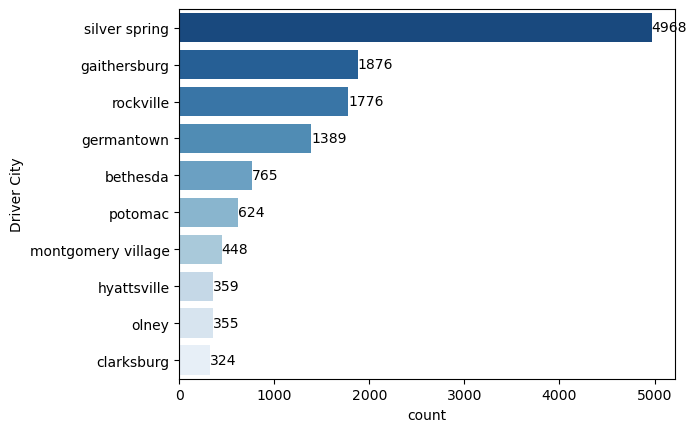

In [9]:
# X
# filterb driver state 
ax=sns.countplot(temp[temp["Accident"]==1]["Driver City"],order=temp[temp["Accident"]==1]["Driver City"].value_counts().head(10).index,palette="Blues_r")
for con in ax.containers:
    ax.bar_label(container=con)
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_13444\334677791.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




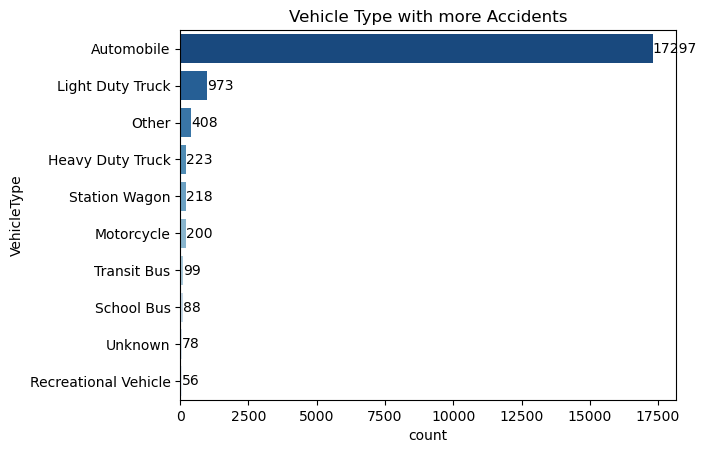

In [10]:
# X
ax=sns.countplot(df[df["Accident"]==1]["VehicleType"],order=df[df["Accident"]==1]["VehicleType"].value_counts().head(10).index,palette="Blues_r")
for con in ax.containers:
    ax.bar_label(container=con)
plt.title("Vehicle Type with more Accidents")
plt.show()

In [11]:
df["Year"]=df["Date Of Stop"].dt.year

Text(0.5, 1.0, 'Number of Accidents from 2012 to 2025')

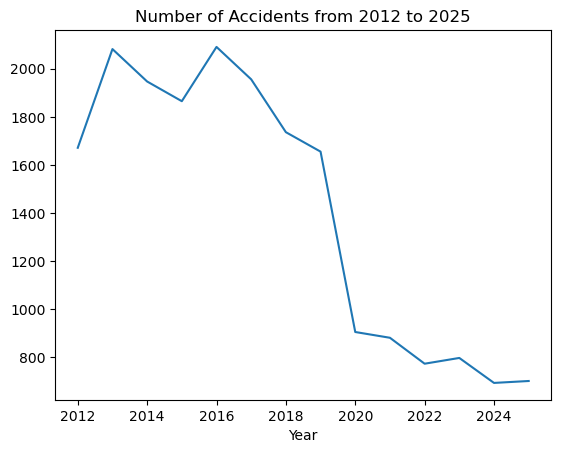

In [12]:
# X
sns.lineplot(x=df[df["Accident"]==1]["Year"].value_counts().index,y=df[df["Accident"]==1]["Year"].value_counts().values)
plt.title("Number of Accidents from 2012 to 2025")

Text(0.5, 1.0, 'Number of Accidents in Weekdays')

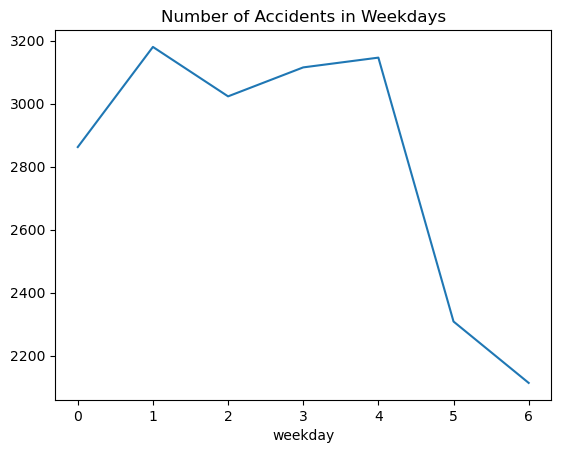

In [13]:
# X
df["weekday"]=df["Date Of Stop"].dt.weekday
sns.lineplot(x=df[df["Accident"]==1]["weekday"].value_counts().index,y=df[df["Accident"]==1]["weekday"].value_counts().values)
plt.title("Number of Accidents in Weekdays")

C:\Users\kumar\AppData\Local\Temp\ipykernel_13444\3630769533.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




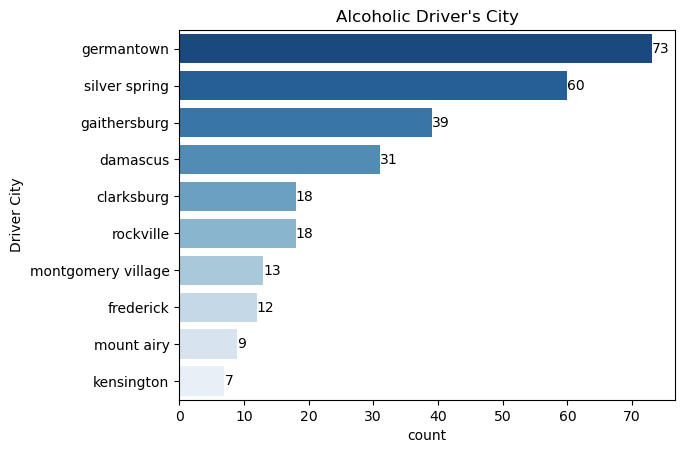

In [14]:
# X
ax=sns.countplot(df[df["Alcohol"]==1]["Driver City"],order=df[df["Alcohol"]==1]["Driver City"].value_counts().head(10).index,palette="Blues_r")
for con in ax.containers:
    ax.bar_label(container=con)
plt.title("Alcoholic Driver's City")
plt.show()

In [15]:
# Accident prone locations
df[df["Accident"]==1].groupby(["Latitude","Longitude"]).agg({"SeqID":"count"}).sort_values("SeqID",ascending=False).head(10).rename(columns={"SeqID":"Accident Counts"})

,,Accident Counts
Latitude,Longitude,
39.110610,-76.989798,11
39.048184,-77.095822,7
39.082770,-76.948513,6
38.978623,-77.129625,5
39.020907,-77.137338,5
39.181238,-77.269723,5
38.983535,-77.092880,4
39.020945,-77.137475,4
39.095207,-76.930143,4


In [16]:
# X
import plotly.express as px

fig = px.treemap(df, path=[df[df["Accident"]==1]["Make"].value_counts().head(10).index],values=df[df["Accident"]==1]["Make"].value_counts().head(10).values, width=600, height=300,
                 title="Top 10 Make of car with Highest Accidents")
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c','#2bd496','#2bd4ba','#2bbad4']
fig.update_layout(
    treemapcolorway = colors,
    margin = dict(t=30, l=25, r=25, b=25))
fig.show()

In [17]:
# X
temp=df.groupby(["Gender","Race"]).agg({"Accident":"count"})
temp.reset_index(inplace=True)
fig = px.sunburst(temp, path=['Gender', 'Race'], values='Accident',height=400,width=500,title="Contribution of Gender and Race in Accidents")
fig.update_layout(margin = dict(t=30, l=25, r=25, b=25))
fig.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_13444\534332860.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




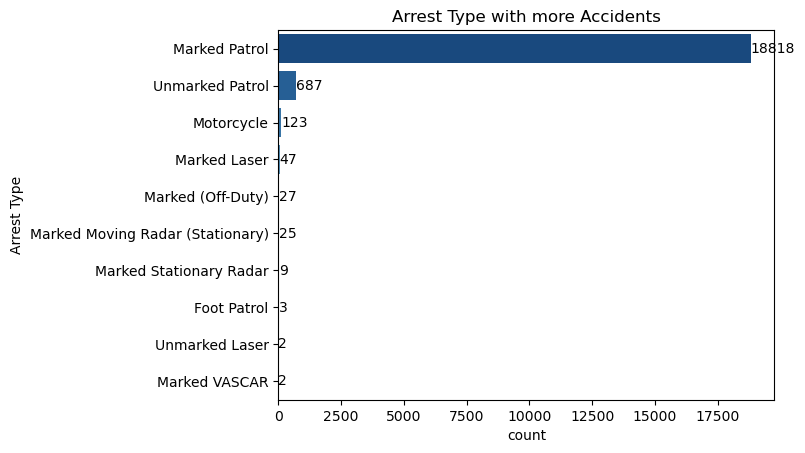

In [18]:
ax=sns.countplot(df[df["Accident"]==1]["Arrest Type"],order=df[df["Accident"]==1]["Arrest Type"].value_counts().head(10).index,palette="Blues_r")
for con in ax.containers:
    ax.bar_label(container=con)
plt.title("Arrest Type with more Accidents")
plt.show()

In [ ]:
filter_list=df.columns[8:18].tolist()
filter_list.insert(0,"All")
temp=pd.merge(charges,df,how="inner",on="SeqID")
temp=temp.query(f"`{filter_list[3]}`==1")

In [1]:
# pd.read_sql("select * from fact_table f inner join charges c on f.SeqID=c.SeqID",engine).head()

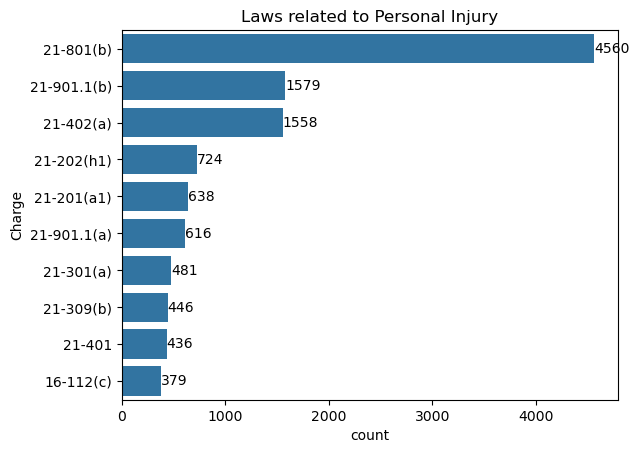

In [29]:
# filtera
ax=sns.countplot(temp["Charge"],order=temp["Charge"].value_counts().head(10).index)
for con in ax.containers:
    ax.bar_label(container=con)
plt.title(f"Laws related to {filter_list[3]}")
plt.show()